In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import torch


In [2]:
def n_walk_matrix(A, k):
    #A is the adjacency matrix of the graph
    W = {}
    W[1] = A
    for i in range(2, A.shape[1]):
        A_power_i = W[i - 1] * A
        W[i] = A_power_i - np.diag(np.diag(A_power_i))
    return W[k]

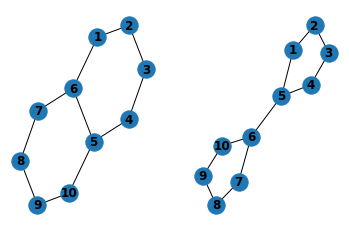

In [20]:
alpha = nx.Graph()
beta = nx.Graph()

alpha.add_edges_from([(1, 2), (2, 3), (3, 4), (4, 5), (5, 6), (6, 1), (6, 7), (7, 8), (8, 9), (9, 10), (10, 5)])
beta.add_edges_from([(1, 2), (2, 3), (3, 4), (4, 5), (5, 1), (5, 6), (6, 7), (7, 8), (8, 9), (9, 10), (10, 6)])
subax1 = plt.subplot(121)
nx.draw(alpha, with_labels=True, font_weight='bold')
subax2 = plt.subplot(122)
nx.draw(beta, with_labels=True, font_weight='bold')

In [28]:
adj = nx.adjacency_matrix(alpha).todense()
adj

n_walk_matrix(adj, 4)

/tmp/ipykernel_450/769908133.py:1: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  adj = nx.adjacency_matrix(alpha).todense()


matrix([[0, 0, 3, 0, 5, 0, 3, 0, 2, 0],
        [0, 0, 0, 3, 0, 4, 0, 1, 0, 2],
        [3, 0, 0, 0, 4, 0, 2, 0, 1, 0],
        [0, 3, 0, 0, 0, 5, 0, 2, 0, 3],
        [4, 0, 3, 0, 0, 0, 4, 0, 3, 0],
        [0, 3, 0, 4, 0, 0, 0, 3, 0, 4],
        [3, 0, 2, 0, 5, 0, 0, 0, 3, 0],
        [0, 1, 0, 2, 0, 4, 0, 0, 0, 3],
        [2, 0, 1, 0, 4, 0, 3, 0, 0, 0],
        [0, 2, 0, 3, 0, 5, 0, 3, 0, 0]])

In [5]:
nx.all_shortest_paths(alpha, 1, 1)

<generator object _build_paths_from_predecessors at 0x7f634c1b0740>

In [6]:
[p for p in nx.all_shortest_paths(alpha, source=1, target=4)]


[[1, 2, 3, 4], [1, 6, 5, 4]]

In [7]:
def shortest_paths(G):
    #G is a nx.graph, can compute either from G=nx.Graph or G=nx.from_numpy_matrix(A) where A is adjacency matrix
    P = [ {} for _ in range(1, len(G._node) + 1) ]
    Q = {}
    for i in range(0, len(G._node) ):
        for j in range(1, len(G._node) + 1):
            P[i][j] = [v for v in nx.all_shortest_paths(G, source=i + 1, target=j)]
        Q[i + 1] = P[i] 
    return Q

In [8]:
T = shortest_paths(alpha)
T

{1: {1: [[1]],
  2: [[1, 2]],
  3: [[1, 2, 3]],
  4: [[1, 2, 3, 4], [1, 6, 5, 4]],
  5: [[1, 6, 5]],
  6: [[1, 6]],
  7: [[1, 6, 7]],
  8: [[1, 6, 7, 8]],
  9: [[1, 6, 5, 10, 9], [1, 6, 7, 8, 9]],
  10: [[1, 6, 5, 10]]},
 2: {1: [[2, 1]],
  2: [[2]],
  3: [[2, 3]],
  4: [[2, 3, 4]],
  5: [[2, 1, 6, 5], [2, 3, 4, 5]],
  6: [[2, 1, 6]],
  7: [[2, 1, 6, 7]],
  8: [[2, 1, 6, 7, 8]],
  9: [[2, 1, 6, 5, 10, 9], [2, 3, 4, 5, 10, 9], [2, 1, 6, 7, 8, 9]],
  10: [[2, 1, 6, 5, 10], [2, 3, 4, 5, 10]]},
 3: {1: [[3, 2, 1]],
  2: [[3, 2]],
  3: [[3]],
  4: [[3, 4]],
  5: [[3, 4, 5]],
  6: [[3, 2, 1, 6], [3, 4, 5, 6]],
  7: [[3, 2, 1, 6, 7], [3, 4, 5, 6, 7]],
  8: [[3, 2, 1, 6, 7, 8], [3, 4, 5, 6, 7, 8], [3, 4, 5, 10, 9, 8]],
  9: [[3, 4, 5, 10, 9]],
  10: [[3, 4, 5, 10]]},
 4: {1: [[4, 3, 2, 1], [4, 5, 6, 1]],
  2: [[4, 3, 2]],
  3: [[4, 3]],
  4: [[4]],
  5: [[4, 5]],
  6: [[4, 5, 6]],
  7: [[4, 5, 6, 7]],
  8: [[4, 5, 6, 7, 8], [4, 5, 10, 9, 8]],
  9: [[4, 5, 10, 9]],
  10: [[4, 5, 10]]},
 5: {1: 

In [9]:
def num_of_elements_of_length_k(lst, k):
    #lst: a list in the form {1: [[a, b], [c, d]], 2: [[e]]}
    #k: the required length
    i = 0
    idx_set = {}
    for idx in range(1, len(lst) + 1):
        if len(lst[idx][0]) == k:
            idx_set[i] = idx
            i = i + len(lst[idx])
    return i, idx_set

def path_length_num_set(G):
    #G is a nx.graph, can compute either from G=nx.Graph or G=nx.from_numpy_matrix(A) where A is adjacency matrix
    """this returns a list of lengths
    for example: 
    [[1, 4, 6],
     [1, 3, 5],
     [1, 2, 4]]
     the first row of the list tells us the number of paths that are connected to node one of length = index - 1
     in this case, first row in second column entry 4 tells us that there are 4 paths that are connected to node 1 with length 2 - 1.
    """ 
    path_set = shortest_paths(G)
    length_set = [ {} for _ in range(len(G._node)) ]
    
    for i in range(len(G._node)):
        for j in range(len(G._node)):
            length_set[i][j], the_set = num_of_elements_of_length_k(path_set[i + 1], j +1)
    length_set = [list(idx.values()) for idx in length_set] #convert to a list of lists
    return length_set

def path_length_poset(G):
    #G is a nx.graph, can compute either from G=nx.Graph or G=nx.from_numpy_matrix(A) where A is adjacency matrix
    """this returns the list of WL aggregated nodes
    """ 
    p = np.array(path_length_num_set(G)).T
    class_set = {}
    d_1 = []
    for j in list(set(p[0])):
        t = [i + 1 for i, n in enumerate(p[0]) if n == j]
        d_1.append(t)
    class_set[0] = d_1
    for k in range(1, len(G._node)):
        d = []
        num_previous_class = len(class_set[k - 1])
        for i in range(num_previous_class):
            new_class_index = class_set[k - 1][i]
            new_class = [ p[k][v - 1] for v in new_class_index ]
            for j in list(set(new_class)):
                t = [new_class_index[i] for i, n in enumerate(new_class) if n == j]
                d.append(t)
                
        class_set[k] = d
        if class_set[k] == class_set[k - 1]:
            class_set.popitem()
            break
            
    return class_set
            
        
    
                    

In [31]:
T[1]

{1: [[1]],
 2: [[1, 2]],
 3: [[1, 2, 3]],
 4: [[1, 2, 3, 4], [1, 6, 5, 4]],
 5: [[1, 6, 5]],
 6: [[1, 6]],
 7: [[1, 6, 7]],
 8: [[1, 6, 7, 8]],
 9: [[1, 6, 5, 10, 9], [1, 6, 7, 8, 9]],
 10: [[1, 6, 5, 10]]}

In [11]:
num_of_elements_of_length_k(T[1], 4)

(4, {0: 4, 2: 8, 3: 10})

In [12]:
path_length_num_set(alpha)

[[1, 2, 3, 4, 2, 0, 0, 0, 0, 0],
 [1, 2, 2, 3, 3, 3, 0, 0, 0, 0],
 [1, 2, 2, 3, 3, 3, 0, 0, 0, 0],
 [1, 2, 3, 4, 2, 0, 0, 0, 0, 0],
 [1, 3, 4, 4, 0, 0, 0, 0, 0, 0],
 [1, 3, 4, 4, 0, 0, 0, 0, 0, 0],
 [1, 2, 3, 4, 2, 0, 0, 0, 0, 0],
 [1, 2, 2, 3, 3, 3, 0, 0, 0, 0],
 [1, 2, 2, 3, 3, 3, 0, 0, 0, 0],
 [1, 2, 3, 4, 2, 0, 0, 0, 0, 0]]

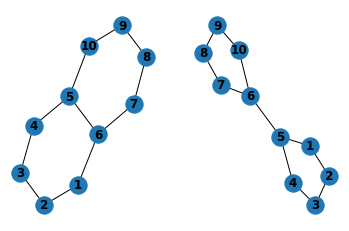

In [13]:
subax1 = plt.subplot(121)
nx.draw(alpha, with_labels=True, font_weight='bold')
subax2 = plt.subplot(122)
nx.draw(beta, with_labels=True, font_weight='bold')

In [14]:
path_length_poset(alpha)

{0: [[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]],
 1: [[1, 2, 3, 4, 7, 8, 9, 10], [5, 6]],
 2: [[2, 3, 8, 9], [1, 4, 7, 10], [5, 6]]}

In [15]:
path_length_poset(beta)

{0: [[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]],
 1: [[1, 2, 3, 4, 7, 8, 9, 10], [5, 6]],
 2: [[2, 3, 8, 9], [1, 4, 7, 10], [5, 6]]}

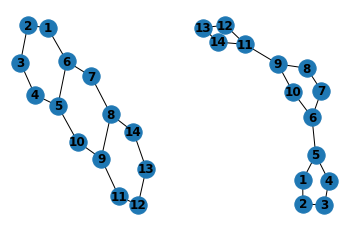

In [16]:
gamma = nx.Graph()
theta = nx.Graph()

gamma.add_edges_from([(1, 2), (2, 3), (3, 4), (4, 5), (5, 6), (6, 1), (6, 7), (7, 8), (8, 9), 
                      (9, 10), (10, 5), (9, 11), (11, 12),(12, 13),(13, 14), (14, 8)])
theta.add_edges_from([(1, 2), (2, 3), (3, 4), (4, 5), (5, 1), (5, 6), (6, 7), (7, 8), (8, 9),
                      (9, 10), (10, 6), (9, 11), (11, 12), (12, 13), (13, 14), (14, 11)])
subax1 = plt.subplot(121)
nx.draw(gamma, with_labels=True, font_weight='bold')
subax2 = plt.subplot(122)
nx.draw(theta, with_labels=True, font_weight='bold')

In [17]:
path_length_poset(gamma)

{0: [[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]],
 1: [[1, 2, 3, 4, 7, 10, 11, 12, 13, 14], [5, 6, 8, 9]],
 2: [[2, 3, 12, 13], [1, 4, 11, 14], [7, 10], [5, 6, 8, 9]]}

In [18]:
path_length_poset(theta)

{0: [[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]],
 1: [[1, 2, 3, 4, 7, 8, 10, 12, 13, 14], [5, 6, 9, 11]],
 2: [[2, 3, 13], [1, 4, 7, 8, 12, 14], [10], [5, 6, 9, 11]],
 3: [[2, 3], [13], [1, 4, 12, 14], [7, 8], [10], [5, 11], [6, 9]]}